<a href="https://colab.research.google.com/github/Jakson-Alves/IA-2021/blob/main/Identifica_moeda_template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

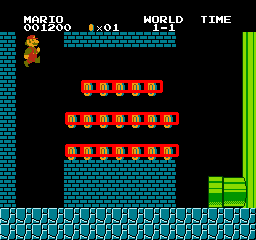

In [2]:
#Carrega a imagem do mario 
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) #altera para escala de cinza

#carrega o template, 0 abre a imagem em escala de cinza sem precisar de conversão
template = cv2.imread('coin.png',0)

#mostra o tamanho do template (w altura, h largura)
w, h = template.shape
# print(w, h)

# Res cria uma matriz a partir do tamplate
# matchtemplate faz uma busca do template na imagem, o cv2.TM_CC... é a forma como ele vai fazer a busca
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)

# tamanho do limiar (semelhança) (a partir desse valor tem o objeto que busco)
threshold = 0.80

# Se tiver o threshold dentro de res
# somente valores maiores que o threshold
loc = np.where( res >= threshold)

#For nas localizações para fazer retangulo ao redor
#[::-1] inverte a localização
for pt in zip(*loc[::-1]):
    #primeiro imagem/ localização/
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

#Mostra as moedas circularam
cv2_imshow(img_rgb)